# Alternative projection with complex func

In [6]:
# Getting all the required library
# using JuMP
# using GLPK
using Plots

In [7]:
# Create the vander function for creating a form of representing the vectors and calculations
vander(t,n) = hcat([t.^i for i = 0:n-1]...)

vander (generic function with 1 method)

In [35]:
# Setting the parameters
T=1:0.1:2 # Interpolation points, note it has to be different from 0 so it's best to pick from 1
(n, m) = (3, 2) # The power of the 2 poly in the rational functions
hy_space_sz = n+m+2
# N = 10
# c = rand(N)
# f(t) = sum([c[i]*sin(π*i*(t+0.25)) for i in 1:N]) # Function to approximate

f(t) = (t^3+3)/(t^2 + 1) #function simple to test

f (generic function with 1 method)

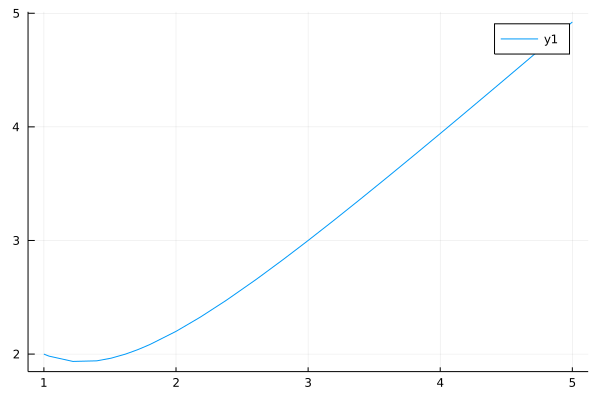

In [9]:
# plot the f to see
plot(f,1,5)

In [10]:
# we are creating hyperplanes by thinking f(x) = p(x)/q(x)
# or converting to <A, xn> - f(x)<B, xm> = 0 with A, B is correspondingly coe of p(x) and q(x) and are the keys
# xn and xm are the vectors which will represent the fucntions
# for easy calculation combining A and B into a big vector so it would be: <A to B, xn to -f(x)xm> = 0
# this is a hyperplan formula with d = 0
# therefore, xn to -f(x)xm is the vector of the hyperplane in R n+m+2 space

# function to calculate the distince between a point and the hyperplane with the sign
function calculateDisAndPoint(check_value, the_point, n, m)
    hy_space_sz = n + m + 2
    xn = vander(check_value, n+1)
    xm = vander(check_value, m+1)
    big_vect = hcat(xn, -f(check_value)*xm)
#     calculate distance by |vect.start_point + d|/||vect|| , d is 0 in this case
    a = sum(hcat([the_point[i]*big_vect[i] for i in 1:hy_space_sz]...))
    b = sum(hcat([big_vect[i]*big_vect[i] for i in 1:hy_space_sz]...))
    c = sqrt(b)
    dis = a/c
#     calculate lambda in x - x0 = lambda.vect to calculate the projected point
    lambd = a/b
    x0 = the_point - (lambd * big_vect)
    return dis, x0
end

calculateDisAndPoint (generic function with 1 method)

In [11]:
# iterate after a certain times and store the value in a array of the size of number of hyperplanes
num_hy = size(T)[1]
distA = Array{Float64}(undef, 1, num_hy)
pointA = Array{Array{Float64}}(undef, 1, num_hy)
ite_times = 9
s_p = vander(1, hy_space_sz)

for i in 1:(ite_times*num_hy)
    check = i%num_hy + 1
    result = calculateDisAndPoint(T[check],s_p,n,m)
    distA[check] = result[1]
    pointA[check] = result[2]
    s_p = result[2]
end

In [12]:
function checkArrHasUndef(arr)
    for i in 1:size(arr)[2]
        if isassigned(arr, i) == false
            return true
        end
    end
    return false
end

checkArrHasUndef (generic function with 1 method)

In [36]:
num_hy = size(T)[1]
result_pointA = Array{Array{Float64}}(undef, 1, num_hy)

s_p = vander(1, hy_space_sz)

while checkArrHasUndef(result_pointA)
    distA = Array{Float64}(undef, 1, num_hy)
    pointA = Array{Array{Float64}}(undef, 1, num_hy)
    for i in 1:num_hy
        result = calculateDisAndPoint(T[i],s_p,n,m)
        distA[i] = abs(result[1])
        pointA[i] = result[2]
    end
    
    max_i = findmax(distA)[2][2]
    result_pointA[max_i] = pointA[max_i]
    s_p = pointA[max_i]
    println(max_i)
end

1
11
1
11
1
10
1
9
1
8
1
7
1
7
1
6
1
6
1
6
1
5
1
5
11
5
1
5
11
5
1
5
11
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
11
6
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
11
6
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
11
6
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
11
6
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
11
6
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
1
5
11
5
11
6
1
5
11
6
1
5
11
5
1
5
11
5
11
6
1
5
11
6
1
5
11
5
1
5
11
5
1
5
11
5
11
6
1
5
11
6
1
5
11
5
1
5
11
5
11
6
1
5
11
6
1
5
11
5
1
5
11
5
1
5
11
5
11
6
1
5
11
6
1
5
11
5
1
5
11
5
11
6
1
5
11
6
1
5
11
5
1
5

7
11
7
3
7
11
7
3
7
11
7
11
7
3
7
11
7
11
7
3
7
11
7
3
7
11
7
11
7
3
7
11
7
11
7
3
7
11
7
3
7
11
7
11
7
3
7
11
7
3
7
11
7
11
7
3
7
11
7
11
7
3
7
11
7
3
7
11
7
11
7
3
7
11
7
11
7
3
7
11
7
3
7
11
7
11
7
3
7
11
7
3
7
11
7
11
7
3
7
11
7
11
7
3
7
11
7
3
7
11
7
11
7
3
7
11
7
11
7
3
7
11
7
3
7
11
7
11
7
3
7
11
7
3
7
11
7
11
7
3
7
11
7
11
7
3
7
11
7
3
7
11
7
11
7
3
7
11
7
11
7
3
7
11
7
3
7
11
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3

1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7


3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7

3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7


1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3

7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3

1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3

1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3


7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1

3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
1

7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1


3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7

1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7

7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
1

11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3


1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3

7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
11
7
3
7
11
7
3
1

3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3


11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7

7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
1

7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
1

11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3


1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3


3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7


11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3

1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7


3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1

7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
1

7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
1

7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3

3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11


7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
11
7
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7

3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
2
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7


11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
2
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
2
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
2
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
2
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
2
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
2
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
2
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
3
7
11
7
3
7
11
7
3
1
3
7
11
7
3
1
2
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7


3
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
3
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
3
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
3
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
3
7
3
1
3
7
11
7
3
1
3
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
3
7
3
1
3
1
2
7
3
1
3
7
11
7
3
1
2
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
3
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
3
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3

3
1
2
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
1
2
7
3
1
3
7
11
7
3
1
2
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
1
2
7
3
1
3
7
11
7
3
1
2
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
1
2
7
3
1
3
7
11
7
3
1
2
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
1
2
7
3
1
3
7
11
7
3
1
2
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
1
2
7
3
1
3
7
11
7
3
1
2
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
1
2
7
3
1
3
7
11
7
3
1
2
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
1
2
7
11
7
3
1
2
7
11
7
3

11
7
2
1
2
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
1
2
7
3
1
2
1
2
7
11
7
3
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
1
2
7
3
1
2
1
2
7
11
7
3
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
1
2
7
3
1
2
1
2
7
11
7
3
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
3
1
2
7
11
7
3
1
2
7
11
7
3
1
2
1
2
7
3
1
2
1
2
7
11
7
3
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
3
1
2

2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1

7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2

2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11


11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11


7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
6
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
6
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
6
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
6
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
6
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
6
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
6
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
7
11
7
2
1
2
1
2
6
11
7


2
1
2
6
11
7
2
1
2
6
11
7
2
1
2
1
2
6
11
7
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
7
2
1
2
6
11
7
2
1
2
1
2
6
11
7
2
1
2
6
11
7
2
1
2
1
2
6
11
7
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
7
2
1
2
6
11
7
2
1
2
1
2
6
11
7
2
1
2
6
11
7
2
1
2
1
2
6
11
7
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
7
2
1
2
6
11
7
2
1
2
1
2
6
11
7
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
7
2
1
2
6
11
7
2
1
2
1
2
6
11
7
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
7
2
1
2
6
11
7
2
1
2
1
2
6
11
7
2
1
2
6
11
7
2
1
2
1
2
6
11
7
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
7
2
1
2
6
11
7
2
1
2
1
2
6
11
7
2
1
2
6
11
7
2
1
2
1
2
6
11
7
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
7
2
1
2
6
11
7
2
1
2
1
2
6
11
7
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
7
2
1
2
6
11
7
2
1
2
1
2
6
11
7
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
7
2
1
2
6
11
7
2
1
2
1
2
6
11
7
2
1
2
6
11
7
2
1
2
1
2
6
11
7
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
7
2
1
2
6
11
7
2
1
2
1
2
6
11
7
2
1
2
6
11
7
2
1
2
1
2
6
11
7
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
7
2
1
2
6
11
7
2
1
2
1
2
6
11
7
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
7
2
1

6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
7
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
7
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
7
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
7
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
7
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
7
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
7
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
7
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
7
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
7
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6

2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2

6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2


1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2


1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1

2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6


2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2

6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6

6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6


1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6


1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6


2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6

2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6


1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1

6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2


2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6

2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2

2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
2
1
2
1
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6
11
6
2
1
2
6

Excessive output truncated after 524288 bytes.

2
6
2
1
2
1
2
1
2
6
2
1


LoadError: InterruptException:

In [38]:
for x in result_pointA
    println(x)
end

[1.5179874449838955 0.7515626978646063 -0.15884082262214388 0.6233080253418948 0.34285862683017976 0.54427903307757 0.47987101287637673]
[1.5180378295591488 0.7516181208973849 -0.15877985728608743 0.6233750872115569 0.34275988674175356 0.5441704189803012 0.47975153736938103]
[1.514660344514751 0.8333628432741265 0.02217119657981527 0.683596207241005 0.2072401648126578 0.7522989393304677 0.5651825944021845]


LoadError: UndefRefError: access to undefined reference

In [ ]:
# calculate the mid point
mid_p = sum(result_pointA)/num_hy

In [ ]:
for i in mid_p
#     println(i)
end

In [ ]:
# we now have the final results
p(t) = sum((t^(i-1))*mid_p[i] for i in 1:(n+1))
q(t) = sum((t^(i-1))*mid_p[i+n+1] for i in 1:(m+1))
g(t) = p(t)/q(t)

In [ ]:
g(1.2)

In [ ]:
f(1.2)

In [ ]:
plot(g,1,10)
plot!(f,1,10)

In [ ]:
# Find the points of extreme deviation:

σ(t) = g(t) - f(t)
Tmax = maximum(abs.(σ.(T)))
T⁺ = T[findall(t -> σ(t) ≈ Tmax, T)]
T⁻ = T[findall(t -> σ(t) ≈ -Tmax, T)]

In [ ]:
plot(σ,1,5)
scatter!(T⁺,σ.(T⁺))
scatter!(T⁻,σ.(T⁻))